# GeoAdaLer

In [28]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from Optimiser.GeoAdaler import Geoadaler
from helpers import loss_graph
from IPython.display import clear_output

In [29]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


# MNIST Dataset example

In [30]:
# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = datasets.MNIST('mnist_data/', download=True, train=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=16, shuffle=True)
testset = datasets.MNIST('mnist_data/', download=True, train=False, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=True)

## Model

In [31]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
def model_test(model, testloader):
    correct = 0
    total = 0
    with torch.no_grad():
        running_loss = 0.0
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            output = model(images)
            _, predicted = torch.max(output, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            running_loss += loss.item()
        test_loss = running_loss / len(testloader)
    
    return test_loss,correct / total

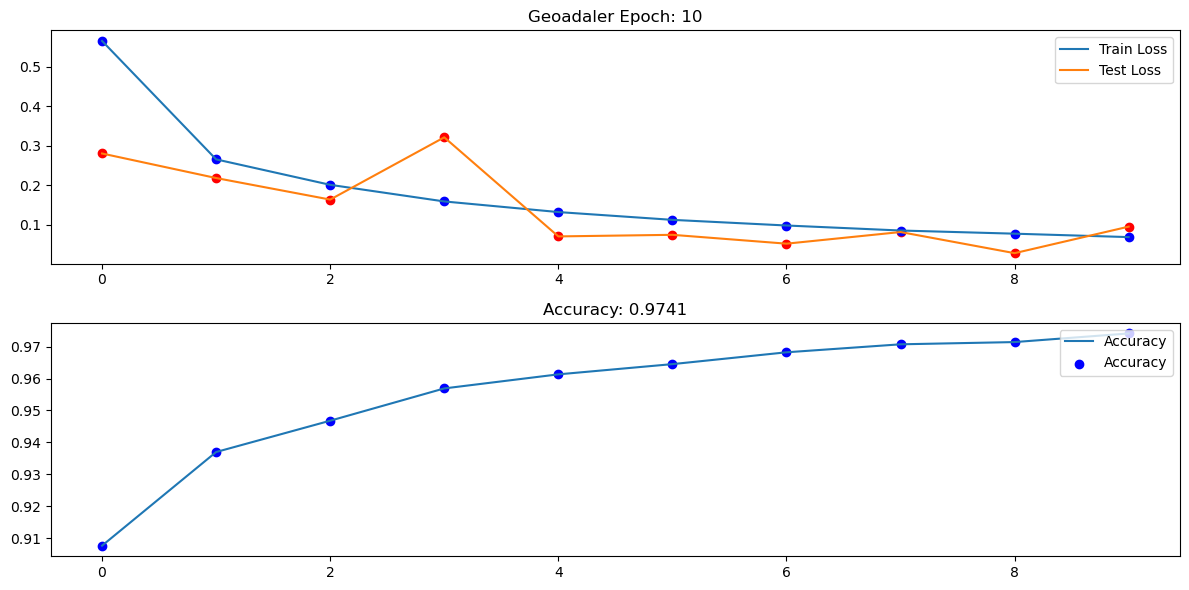

In [32]:
# Model training
model = Model().to(device)
criterion = nn.CrossEntropyLoss()
optimiser = Geoadaler(model.parameters(), lr=0.01)
train_loss = []
test_loss= []
accuracy=[]

for epoch in range(10):
    running_loss = 0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)
        optimiser.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimiser.step()

        running_loss += loss.item()
    
    train_loss.append(running_loss / len(trainloader))   
    testloss, accuracy_ = model_test(model, testloader)
    test_loss.append(testloss)
    accuracy.append(accuracy_)
    clear_output(wait=True)
    loss_graph(train_loss, test_loss, accuracy,epoch)

In [33]:
# Model evaluation
test_loss,accuracy=model_test(model, testloader)  
print(f"Accuracy: {100 *accuracy}%")

Accuracy: 97.41%


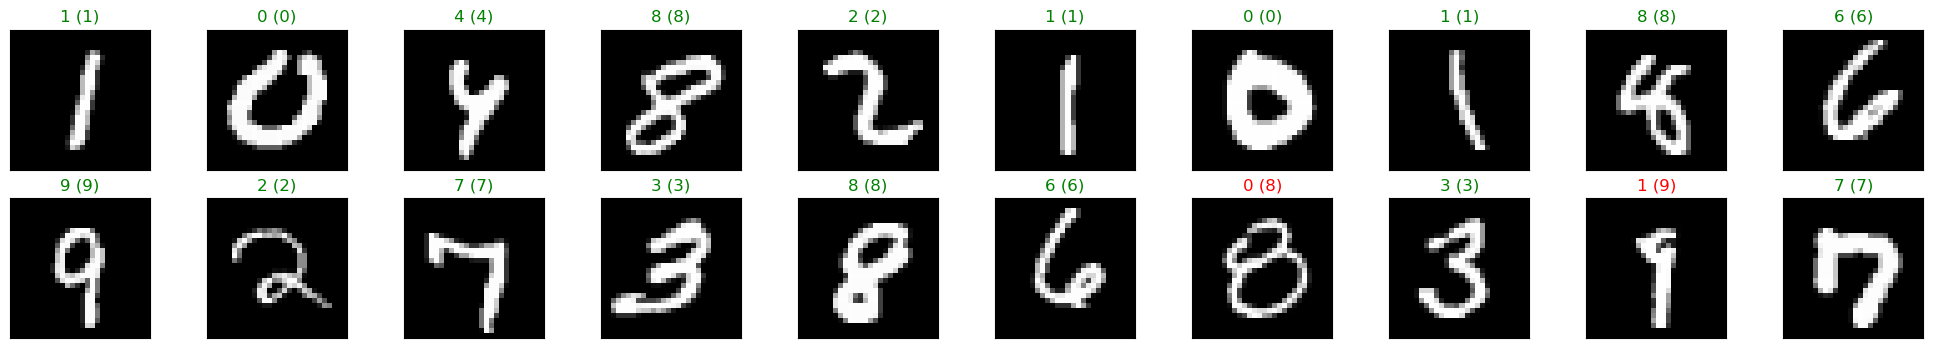

In [34]:
# predictions
images, labels = next(iter(testloader))
images, labels = images.to(device), labels.to(device)
output = model(images)
_, predicted = torch.max(output, 1)

fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    ax.imshow(images[idx].cpu().numpy().squeeze(), cmap='gray')
    ax.set_title(f"{predicted[idx]} ({labels[idx]})", color=('green' if predicted[idx] == labels[idx] else 'red'))

plt.show()

# GeoAdaMax

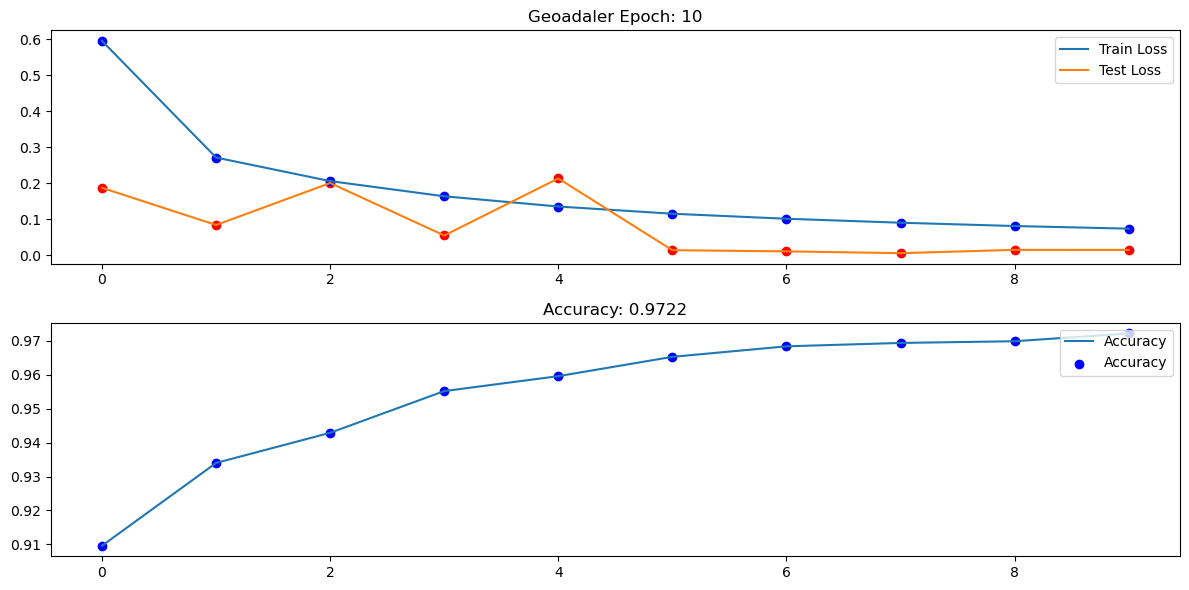

In [35]:
# Model training
model = Model().to(device)
criterion = nn.CrossEntropyLoss()
optimiser = Geoadaler(model.parameters(), lr=0.01,geomax=True)
train_loss = []
test_loss= []
accuracy=[]

for epoch in range(10):
    running_loss = 0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)
        optimiser.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimiser.step()

        running_loss += loss.item()
    
    train_loss.append(running_loss / len(trainloader))   
    testloss, accuracy_ = model_test(model, testloader)
    test_loss.append(testloss)
    accuracy.append(accuracy_)
    clear_output(wait=True)
    loss_graph(train_loss, test_loss, accuracy,epoch)

In [36]:
# Model evaluation
test_loss,accuracy=model_test(model, testloader)  
print(f"Accuracy: {100 *accuracy}%")

Accuracy: 97.22%


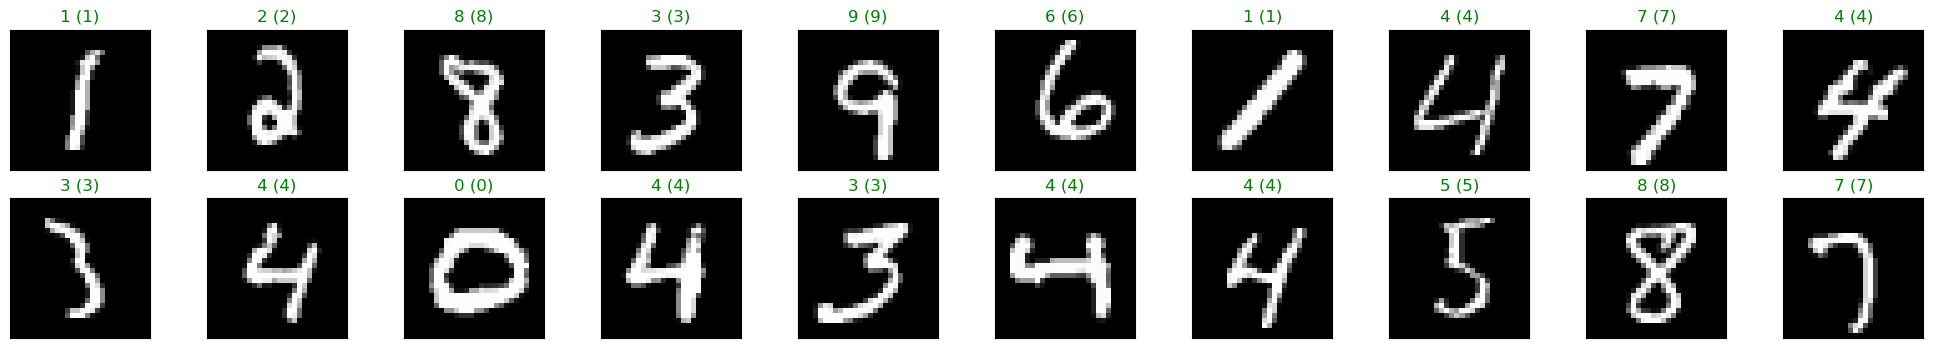

In [37]:
# predictions
images, labels = next(iter(testloader))
images, labels = images.to(device), labels.to(device)
output = model(images)
_, predicted = torch.max(output, 1)

fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    ax.imshow(images[idx].cpu().numpy().squeeze(), cmap='gray')
    ax.set_title(f"{predicted[idx]} ({labels[idx]})", color=('green' if predicted[idx] == labels[idx] else 'red'))

plt.show()